# Group Assigment 4 
### Authored by: CK Mulamba 219001710,   E Ndlovu 219085513,  B Maphela 217076335
### Date: 11 May 2023
### Source: yahoo finance
### url: https://github.com/chadrack-123/Assignment4

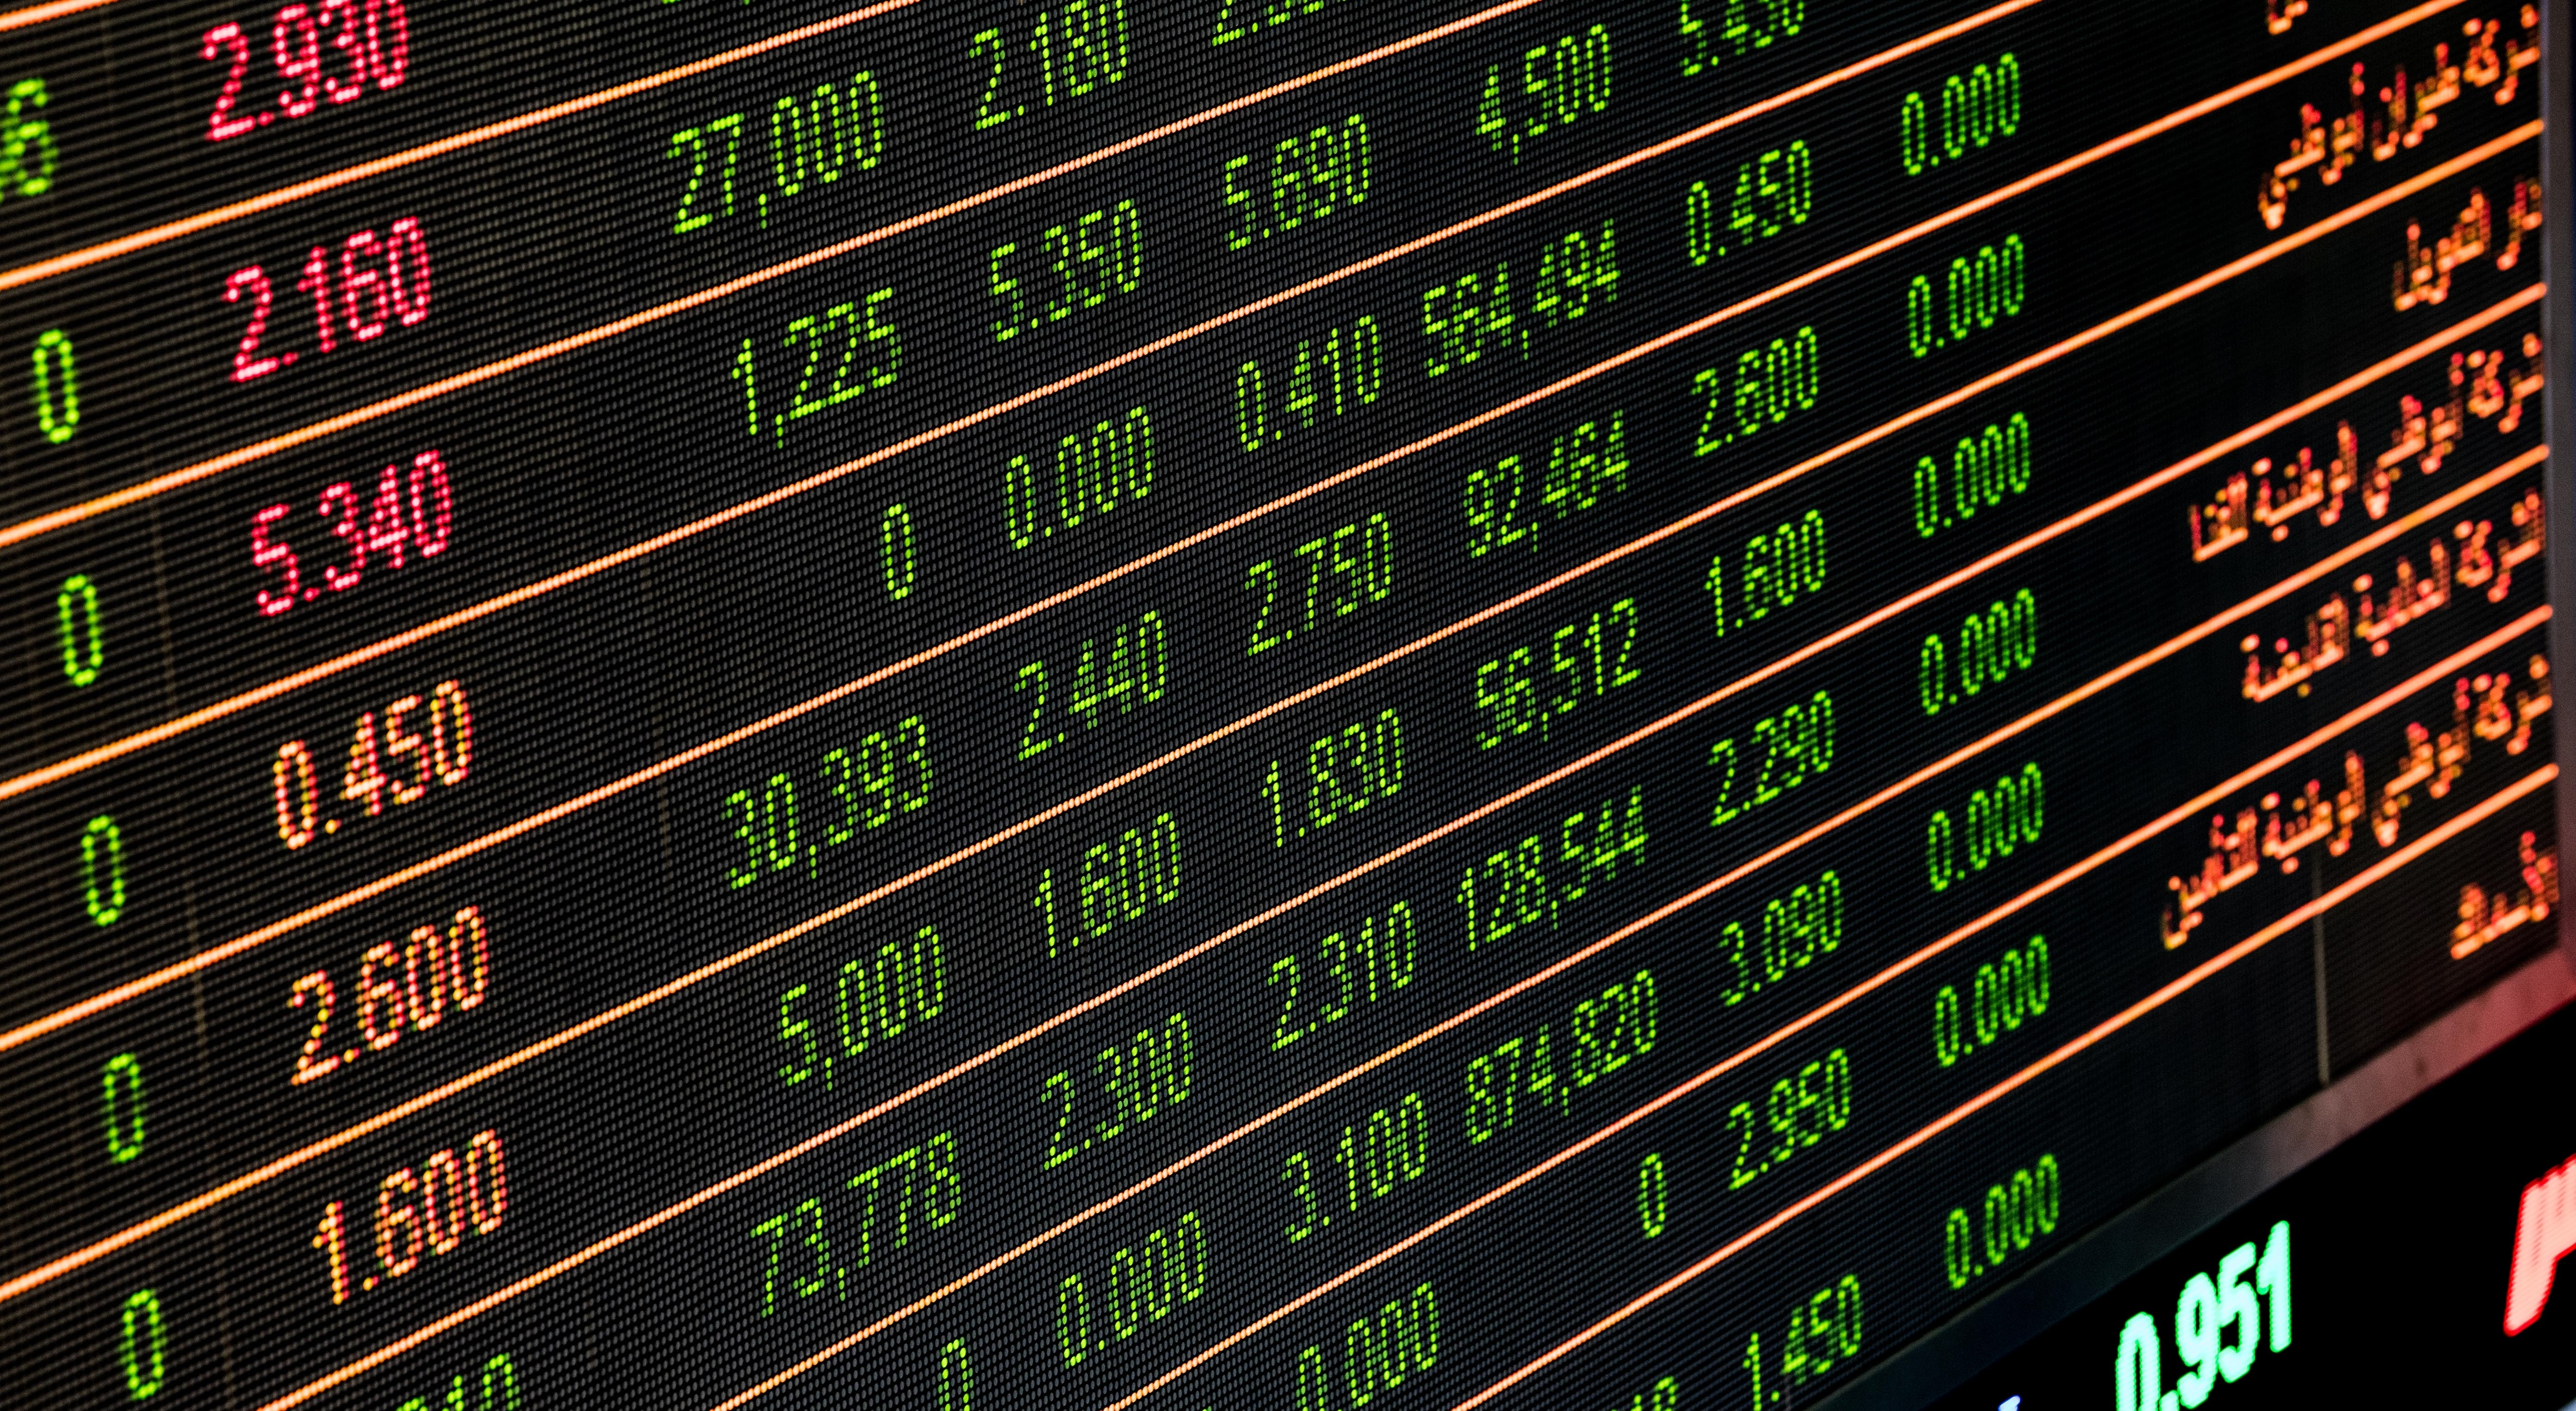

In [1]:
#Importing all the libraries
import pandas as pd
import numpy as np
import requests
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
# ^GSPC: S&P 500 Index
# ^DJI: Dow Jones Industrial Average
# ^IXIC: NASDAQ Composite
# ^N225: Nikkei 225 Index
# ^FTSE: FTSE 100 Index
# ^FCHI: CAC 40 Index
# 399001.SZ: Shenzhen Index


In [2]:
# List of symbols to fetch data for
symbols = ["^GSPC", "^DJI", "^IXIC", "^N225", "^FTSE","^FCHI","399001.SZ"]

[*********************100%***********************]  1 of 1 completed


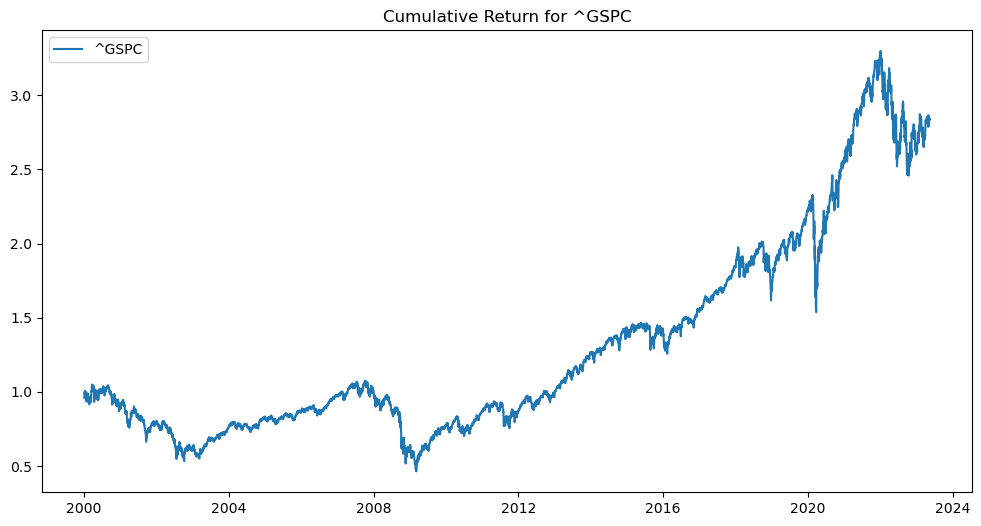

[*********************100%***********************]  1 of 1 completed


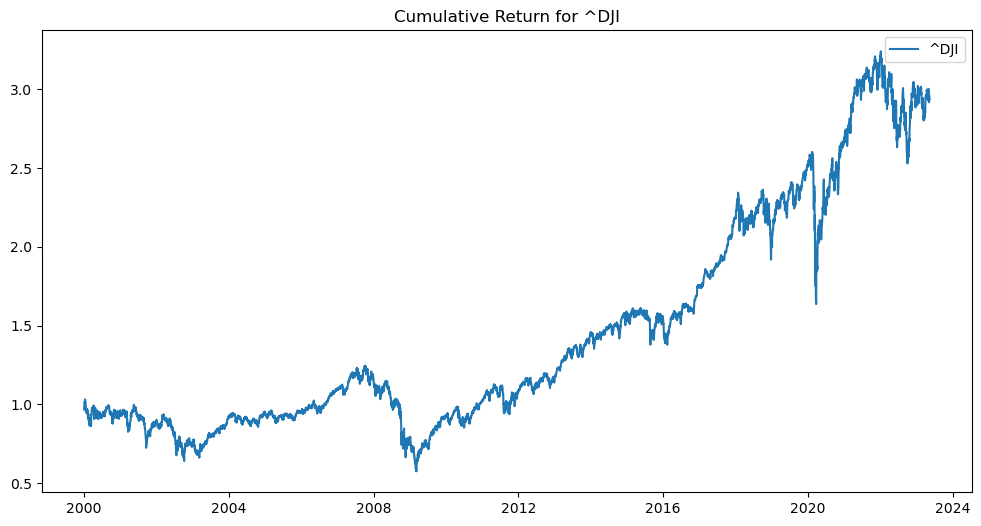

[*********************100%***********************]  1 of 1 completed


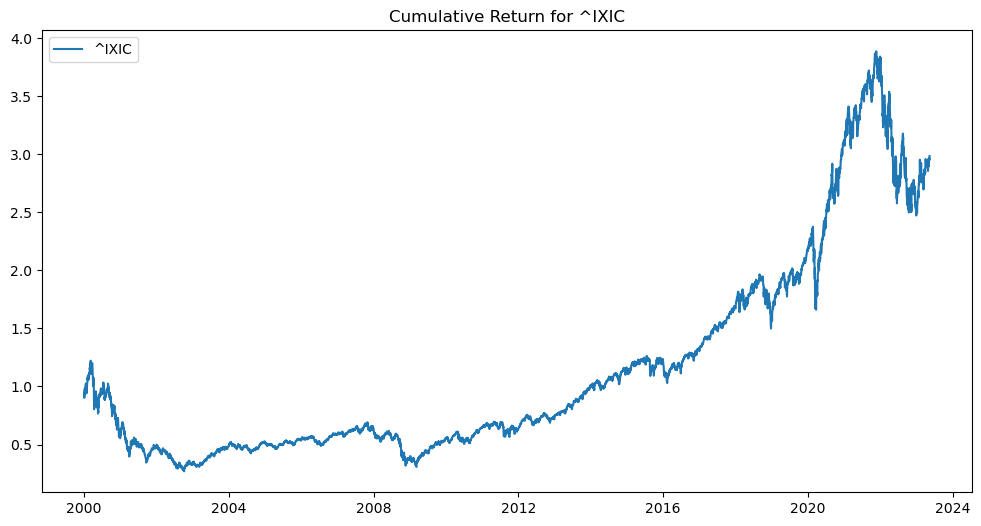

[*********************100%***********************]  1 of 1 completed


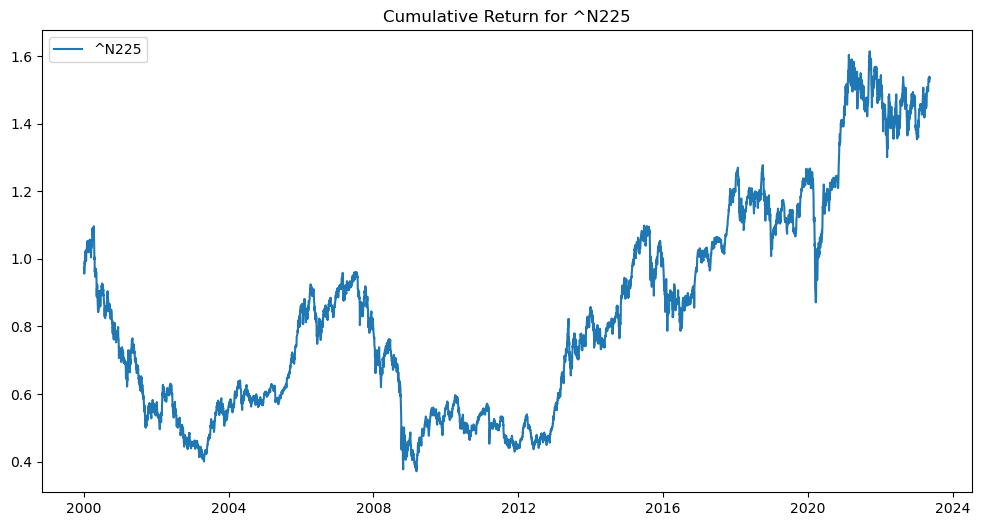

[*********************100%***********************]  1 of 1 completed


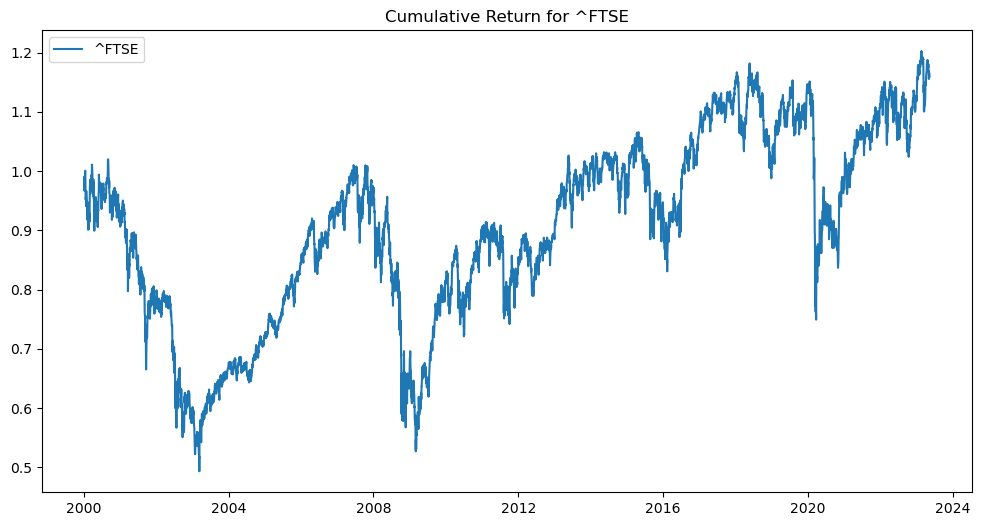

[*********************100%***********************]  1 of 1 completed


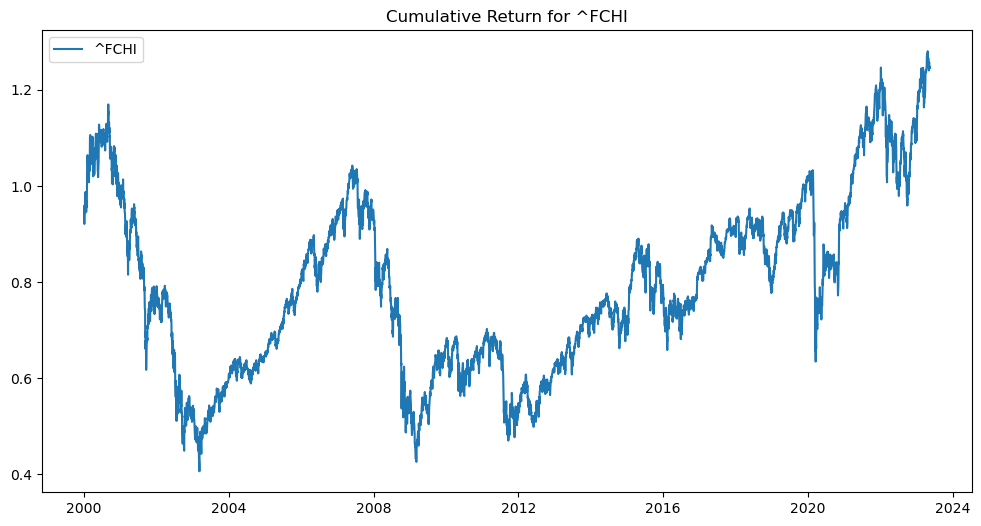

[*********************100%***********************]  1 of 1 completed


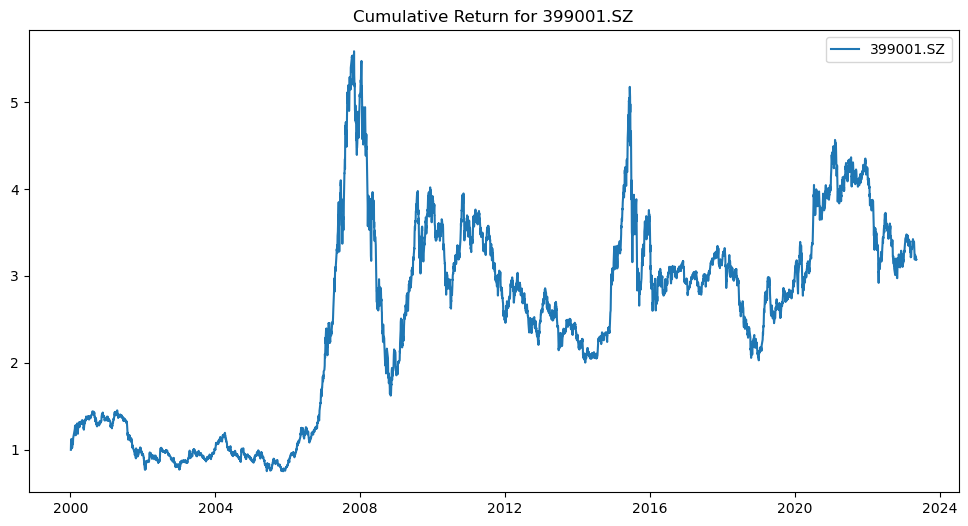

The 3 best investments based on the lowest mean squared error are:
1. ^FTSE from 2023-01-01 to 2023-12-31
2. ^DJI from 2023-01-01 to 2023-12-31
3. ^GSPC from 2023-01-01 to 2023-12-31


In [6]:
# Data collection function
def get_data(symbol):
    data = yf.download(symbol, start='2000-01-01', end='2023-12-31')
    return data

# Data analysis function
def analyze_data(data):
    data['Return'] = data['Close'].pct_change()
    data['Cumulative Return'] = (1 + data['Return']).cumprod()
    return data

# Data visualization function
def visualize_data(data, symbol):
    plt.figure(figsize=(12,6))
    plt.plot(data['Cumulative Return'], label=symbol)
    plt.title('Cumulative Return for ' + symbol)
    plt.legend()
    plt.show()

# Investment recommendation function
def recommend_investment(data, symbol):
    data['Predicted Return'] = data['Return'].shift(-1)
    data.dropna(inplace=True)

    X = np.array(data['Return']).reshape(-1,1)
    y = np.array(data['Predicted Return'])

    X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=0)

    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    return metrics.mean_squared_error(y_test, y_pred)


# Main function
def main():
    mse_values = {}

    for symbol in symbols:
        data = get_data(symbol)
        # print(data.head())
        data = analyze_data(data)
        visualize_data(data, symbol)
        mse = recommend_investment(data, symbol)
        mse_values[symbol] = mse

    best_investments = sorted(mse_values, key=mse_values.get)[:3]
    print("The 3 best investments based on the lowest mean squared error are:")
    for i, symbol in enumerate(best_investments):
        print(f"{i+1}. {symbol} from 2023-01-01 to 2023-12-31")

# Run the main function
main()

In [20]:
data_ftse = yf.download('^FTSE', start='2000-01-01')
data_ftse.describe

[*********************100%***********************]  1 of 1 completed


<bound method NDFrame.describe of                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-01-04  6930.200195  6930.200195  6662.899902  6665.899902  6665.899902   
2000-01-05  6665.899902  6665.899902  6500.399902  6535.899902  6535.899902   
2000-01-06  6535.899902  6547.299805  6424.399902  6447.200195  6447.200195   
2000-01-07  6447.200195  6532.399902  6438.799805  6504.799805  6504.799805   
2000-01-10  6504.799805  6634.200195  6504.799805  6607.700195  6607.700195   
...                 ...          ...          ...          ...          ...   
2023-05-04  7788.399902  7788.399902  7691.299805  7702.600098  7702.600098   
2023-05-05  7702.600098  7781.500000  7702.600098  7778.399902  7778.399902   
2023-05-09  7778.399902  7792.399902  7735.100098  7764.100098  7764.100098   
2023-05-10  7764.100098  7779.000000  7727.100098  7741.299805  7741.299805   
2023-05-11  7741.3

## Prediction of the markets

### Based on the previous analysis we can know that FTSE 100 is in top 1 then followed by Dow Jones Industrial Average and in third there is S&P 500

We can then make a decison to split the R100 000 and invest in the top 3 indices

We will split the money and invest it as follows R60 000 in FTSE, R20 000 in Dow, and R20 000 in S&P500

In [7]:
# Set the investment amount in Rands 
investment_amount_rands = 60000

# Define the number of simulations
num_simulations = 1000

# Define the investment period in years
investment_period = 35

In [ ]:
# Get the historical data for FTSE
symbol = "^FTSE"
data = yf.download(symbol, start='1980-01-01', end='2023-05-10')

# Get the current price in pounds
current_price_pounds = data['Adj Close'][-1]

# Convert the current price to Rands
gbp_to_zar = 20.76  # exchange rate on 2023-05-10
current_price_rands = current_price_pounds * gbp_to_zar

# Calculate the daily returns
returns = data['Adj Close'].pct_change()

# Calculate the mean and standard deviation of the daily returns
mu = returns.mean()
sigma = returns.std()

# Calculate the annualized mean and standard deviation
mu_annual = mu * 252
sigma_annual = sigma * np.sqrt(252)

# Define the simulation function
def simulate_returns(investment_amount, mu, sigma, investment_period):
    returns = np.random.normal(mu, sigma, investment_period)
    prices = investment_amount * (1 + returns).cumprod()
    return prices[-1]

# Run the simulations
simulated_prices = []
for i in range(num_simulations):
    simulated_price = simulate_returns(investment_amount_rands,
mu_annual, sigma_annual, investment_period)
    simulated_prices.append(simulated_price)

# Calculate the mean and standard deviation of the simulated prices
mean_price_rands = np.mean(simulated_prices)
std_price_rands = np.std(simulated_prices)

# Calculate the future price in Rands
future_price_rands = mean_price_rands * gbp_to_zar

# Calculate the investment amount in 35 years
investment_amount_35_years_rands = investment_amount_rands * (1 + mu_annual)**35

# Plot the results
plt.figure(figsize=(12,6))
plt.hist(simulated_prices, bins=50)
plt.axvline(x=mean_price_rands, color='r', linestyle='--', label='Mean')
plt.axvline(x=mean_price_rands-std_price_rands, color='g',
linestyle='--', label='Std Dev')
plt.axvline(x=mean_price_rands+std_price_rands, color='g', linestyle='--')
plt.title('FTSE Simulated Prices after {} Years'.format(investment_period))
plt.xlabel('Price (Rands)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print the results
print('Investment amount: R{}'.format(investment_amount_rands))
print('Investment period: {} years'.format(investment_period))
print('Current price: R{}'.format(round(current_price_rands, 2)))
print('Mean simulated price: R{}'.format(round(mean_price_rands, 2)))
print('Standard deviation of simulated prices:R{}'.format(round(std_price_rands, 2)))
print('Future price in 35 years: R{}'.format(round(future_price_rands, 2)))
print('Investment amount in 35 years:R{}'.format(round(investment_amount_35_years_rands, 2)))

### DOW

In [14]:
# Set the investment amount in Rands 
investment_amount_rands = 20000

# Define the number of simulations
num_simulations = 1000

# Define the investment period in years
investment_period = 35

[*********************100%***********************]  1 of 1 completed


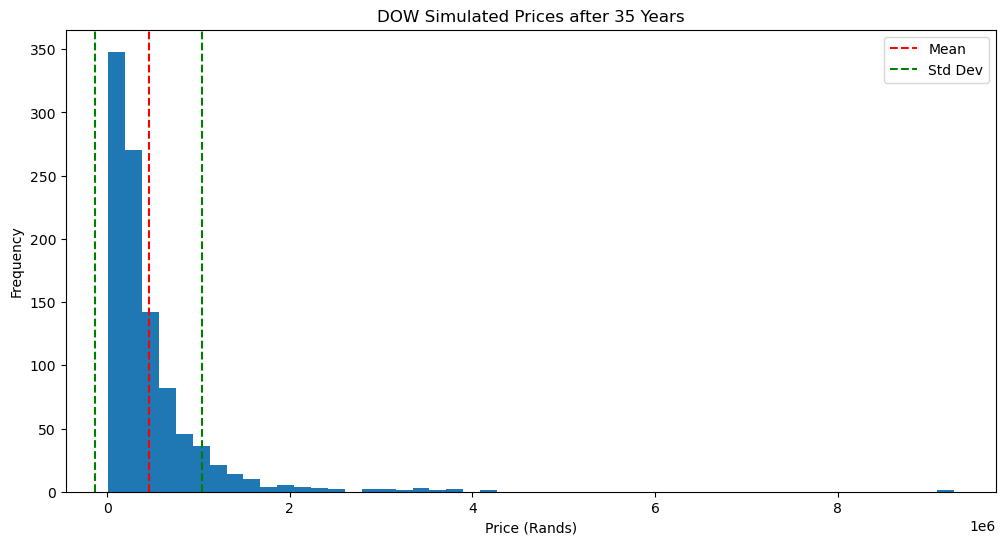

Investment amount: R20000
Investment period: 35 years
Current price: R696743.15
Mean simulated price: R455457.1
Standard deviation of simulated prices:R584720.76
Future price in 35 years: R9455289.47
Investment amount in 35 years:R421545.25


In [15]:
# Get the historical data for FTSE
symbol = "^DJI"
data = yf.download(symbol, start='1980-01-01', end='2023-05-10')

# Get the current price in pounds
current_price_pounds = data['Adj Close'][-1]

# Convert the current price to Rands
gbp_to_zar = 20.76  # exchange rate on 2023-05-10
current_price_rands = current_price_pounds * gbp_to_zar

# Calculate the daily returns
returns = data['Adj Close'].pct_change()

# Calculate the mean and standard deviation of the daily returns
mu = returns.mean()
sigma = returns.std()

# Calculate the annualized mean and standard deviation
mu_annual = mu * 252
sigma_annual = sigma * np.sqrt(252)

# Define the simulation function
def simulate_returns(investment_amount, mu, sigma, investment_period):
    returns = np.random.normal(mu, sigma, investment_period)
    prices = investment_amount * (1 + returns).cumprod()
    return prices[-1]

# Run the simulations
simulated_prices = []
for i in range(num_simulations):
    simulated_price = simulate_returns(investment_amount_rands,
mu_annual, sigma_annual, investment_period)
    simulated_prices.append(simulated_price)

# Calculate the mean and standard deviation of the simulated prices
mean_price_rands = np.mean(simulated_prices)
std_price_rands = np.std(simulated_prices)

# Calculate the future price in Rands
future_price_rands = mean_price_rands * gbp_to_zar

# Calculate the investment amount in 35 years
investment_amount_35_years_rands = investment_amount_rands * (1 + mu_annual)**35

# Plot the results
plt.figure(figsize=(12,6))
plt.hist(simulated_prices, bins=50)
plt.axvline(x=mean_price_rands, color='r', linestyle='--', label='Mean')
plt.axvline(x=mean_price_rands-std_price_rands, color='g',
linestyle='--', label='Std Dev')
plt.axvline(x=mean_price_rands+std_price_rands, color='g', linestyle='--')
plt.title('DOW Simulated Prices after {} Years'.format(investment_period))
plt.xlabel('Price (Rands)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print the results
print('Investment amount: R{}'.format(investment_amount_rands))
print('Investment period: {} years'.format(investment_period))
print('Current price: R{}'.format(round(current_price_rands, 2)))
print('Mean simulated price: R{}'.format(round(mean_price_rands, 2)))
print('Standard deviation of simulated prices:R{}'.format(round(std_price_rands, 2)))
print('Future price in 35 years: R{}'.format(round(future_price_rands, 2)))
print('Investment amount in 35 years:R{}'.format(round(investment_amount_35_years_rands, 2)))

### S&P 500

In [17]:
# Set the investment amount in Rands 
investment_amount_rands = 20000

# Define the number of simulations
num_simulations = 1000

# Define the investment period in years
investment_period = 35

[*********************100%***********************]  1 of 1 completed


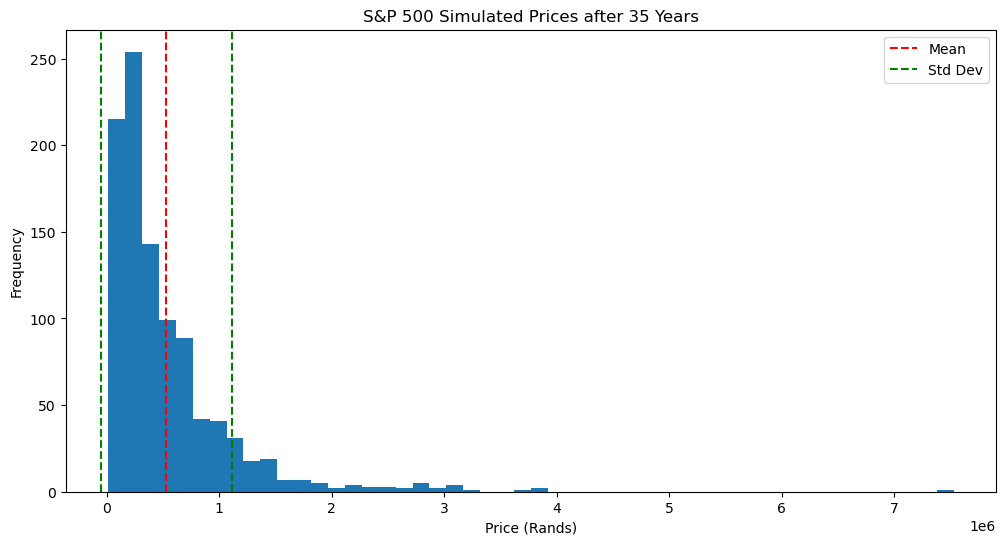

Investment amount: R20000
Investment period: 35 years
Current price: R85513.97
Mean simulated price: R530067.87
Standard deviation of simulated prices:R584343.85
Future price in 35 years: R11004209.04
Investment amount in 35 years:R576059.21


In [18]:
# Get the historical data for FTSE
symbol = "^GSPC"
data = yf.download(symbol, start='1980-01-01', end='2023-05-10')

# Get the current price in pounds
current_price_pounds = data['Adj Close'][-1]

# Convert the current price to Rands
gbp_to_zar = 20.76  # exchange rate on 2023-05-10
current_price_rands = current_price_pounds * gbp_to_zar

# Calculate the daily returns
returns = data['Adj Close'].pct_change()

# Calculate the mean and standard deviation of the daily returns
mu = returns.mean()
sigma = returns.std()

# Calculate the annualized mean and standard deviation
mu_annual = mu * 252
sigma_annual = sigma * np.sqrt(252)

# Define the simulation function
def simulate_returns(investment_amount, mu, sigma, investment_period):
    returns = np.random.normal(mu, sigma, investment_period)
    prices = investment_amount * (1 + returns).cumprod()
    return prices[-1]

# Run the simulations
simulated_prices = []
for i in range(num_simulations):
    simulated_price = simulate_returns(investment_amount_rands,
mu_annual, sigma_annual, investment_period)
    simulated_prices.append(simulated_price)

# Calculate the mean and standard deviation of the simulated prices
mean_price_rands = np.mean(simulated_prices)
std_price_rands = np.std(simulated_prices)

# Calculate the future price in Rands
future_price_rands = mean_price_rands * gbp_to_zar

# Calculate the investment amount in 35 years
investment_amount_35_years_rands = investment_amount_rands * (1 + mu_annual)**35

# Plot the results
plt.figure(figsize=(12,6))
plt.hist(simulated_prices, bins=50)
plt.axvline(x=mean_price_rands, color='r', linestyle='--', label='Mean')
plt.axvline(x=mean_price_rands-std_price_rands, color='g',
linestyle='--', label='Std Dev')
plt.axvline(x=mean_price_rands+std_price_rands, color='g', linestyle='--')
plt.title('S&P 500 Simulated Prices after {} Years'.format(investment_period))
plt.xlabel('Price (Rands)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print the results
print('Investment amount: R{}'.format(investment_amount_rands))
print('Investment period: {} years'.format(investment_period))
print('Current price: R{}'.format(round(current_price_rands, 2)))
print('Mean simulated price: R{}'.format(round(mean_price_rands, 2)))
print('Standard deviation of simulated prices:R{}'.format(round(std_price_rands, 2)))
print('Future price in 35 years: R{}'.format(round(future_price_rands, 2)))
print('Investment amount in 35 years:R{}'.format(round(investment_amount_35_years_rands, 2)))

## Regression analysis on FTSE

[*********************100%***********************]  1 of 1 completed


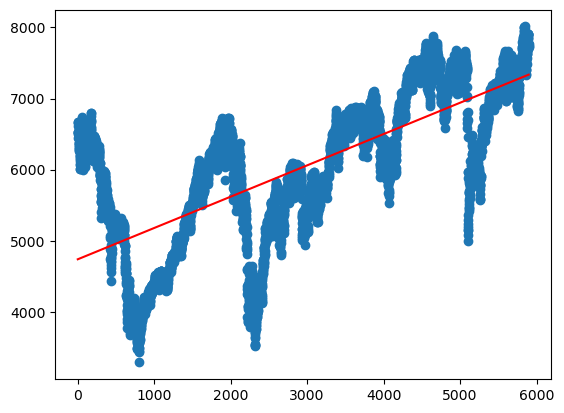

In [19]:
data_ftse = yf.download('^FTSE', start='2000-01-01')

from sklearn.linear_model import LinearRegression
import numpy as np

reg = LinearRegression()
reg.fit(np.array(range(len(data_ftse))).reshape(-1, 1), data_ftse['Close'])

plt.scatter(range(len(data_ftse)), data_ftse['Close'])
plt.plot(range(len(data_ftse)),
reg.predict(np.array(range(len(data_ftse))).reshape(-1, 1)),
color='red')
plt.show()

# Similarly, do for other ETFs
